<a href="https://colab.research.google.com/github/epona7471/YoonKang.github.io/blob/main/Session1_project_3_%EA%B0%95%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 프로젝트 개요
강윤님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

In [2]:
#import python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Get csv file 
df= pd.read_csv('/content/drive/My Drive/Code/vgames2.csv')

# 1. Data preprocessing

In [4]:
df = df.drop(columns=['Unnamed: 0']) #Delete first column with no meaning
df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.isna().sum()   #count NaN value

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
#Browse unique values of each column

for i in df.columns:
  unique_value = list(set(df[i]))
  print(unique_value)

['Colin McRae Rally 2.0', 'Madden NFL 2005', 'Wet', 'NCAA GameBreaker 2004', 'Mercenaries 2: World in Flames', 'Steel Battalion: Heavy Armor', 'Injustice: Gods Among Us', 'Showdown: Legends of Wrestling', "Tom Clancy's Splinter Cell: Chaos Theory", 'Kiniro no Corda 2 f', 'GRID 2', 'Cross + Channel', 'Galaxian', 'Platinum Sudoku', 'Syndicate', 'Karaoke Revolution Volume 3', 'Def Jam Rapstar', 'Medal of Honor: Warfighter', 'My Fitness Coach 2: Exercise and Nutrition', 'Beetle Adventure Racing!', 'Jet Grind Radio', 'Circus Maximus: Chariot Wars', 'Slide Adventure: Mag Kid', 'My Ballet Studio', 'Super Castlevania IV', 'NHL Breakaway 98', "Pirates of the Caribbean: At World's End", 'EverQuest Online Adventures: Frontiers', 'Garou Densetsu 3: Road to the Final Victory', 'Where the Wild Things Are', 'Beyblade: Metal Fusion - Battle Fortress', 'Prince of Persia: The Forgotten Sands', 'Deca Sports Extreme', "Jikkyou Powerful Pro Yakyuu '99 Kaimakuban", 'Yu-Gi-Oh: Duel Monsters 4', 'MediEvil: Re

데이터 처리에 앞서 3가지 수정사항을 발견할 수 있습니다.
1. Year쪽 표기가 2자리로 된  경우
2. Publisher 쪽 표기가 unknown으로 된 경우
3. 판매량 데이터의 단위가 K이거나, 숫자뒤에 M이 표기된 경우

In [7]:
temp = df[((df['Year']>= 0) & (df['Year'] <99))]
print(temp[['Name','Year']])

                                               Name  Year
74          Age of Empires III: Complete Collection   9.0
81                            Treasures of the Deep  97.0
213                                NASCAR Unleashed  11.0
304    Kung Fu Panda: Showdown of Legendary Legends  15.0
768                             NASCAR Thunder 2004   3.0
...                                             ...   ...
15985                                Sugoi Hebereke  94.0
16103                                  Fab 5 Soccer   8.0
16149                    Dragon Ball Z: Burst Limit   8.0
16394                                 Point Blank 3   0.0
16482              Super Robot Taisen F Kanketsuhen  98.0

[100 rows x 2 columns]


Year의 경우 네자리로 표기된 년도가 아닌 1~2 자리로 표기된 게임들의 발매일을 검색해보면 앞에 19XX, 20XX등의 연도가 생략된 것을 알 수 있다

In [8]:
#2자리 년도를 네자리 연도로 변경

for i in df['Year']:
  if i < 100:
    if i < 50:
      df['Year'] = df['Year'].replace(i, 2000 + i)
    elif i > 50:
      df['Year'] = df['Year'].replace(i, 1900 + i)

unique_value = list(set(df['Year']))
print(unique_value)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

- Publisher 부분의 Unknown은 Nan으로 바꿈

In [9]:
# Publisher 부분의 Unknown은 Nan으로 바꿈
df[(df['Publisher'] == 'Unknown')]
df['Publisher'] = df['Publisher'].replace('Unknown',np.nan) 

판매량의 경우 Million을 기본단위로 표기되어 있지만, 숫자 뒤에 M이 표시된 경우와 K가 표시된 경우가 있다. 각각의 경우를 순수 숫자 표기로 바꿔보자



In [10]:
# M 표기를 삭제
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')  # str 붙여줘야함 안그럼 안바뀜
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','') 
df['Other_Sales'] = df['Other_Sales'].str.replace('M','') 

# K 표기를 삭제하고 scaling을 바꿔줌

for i in df['NA_Sales']:
  if 'K' in i:
    temp = i.replace('K','')                              # K를 제거
    temp = float(temp)
    temp = temp * 0.001                                   # Mil 단위로 스케일링을 위해 1/1000을 곱해줌
    temp = str(temp)
    df['NA_Sales'] = df['NA_Sales'].replace(i,temp) #여기선 column 전체가 단위가 아니므로 str 붙이면 안됨
  else:
    continue

for i in df['EU_Sales']:
  if 'K' in i:
    temp = i.replace('K','')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df['EU_Sales'] = df['EU_Sales'].replace(i,temp)

for i in df['JP_Sales']:
  if 'K' in i:
    temp = i.replace('K','')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df['JP_Sales'] = df['JP_Sales'].replace(i,temp)

for i in df['Other_Sales']:
  if 'K' in i:
    temp = i.replace('K','')
    temp = float(temp)
    temp = temp * 0.001
    temp = str(temp)
    df['Other_Sales'] = df['Other_Sales'].replace(i,temp)


In [11]:
#str인 sales 데이터를 numeric data로 전환

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

#2. Data analysis

이제 적당한 전처리가 끝났으므로 
각 변수들(Platform, Year, Genre, Publisher)이 지역별 판매량에 미치는 관계를 알아내보자.

먼저 지역에 따라서 선호하는 게임 장르를 분석해보자.

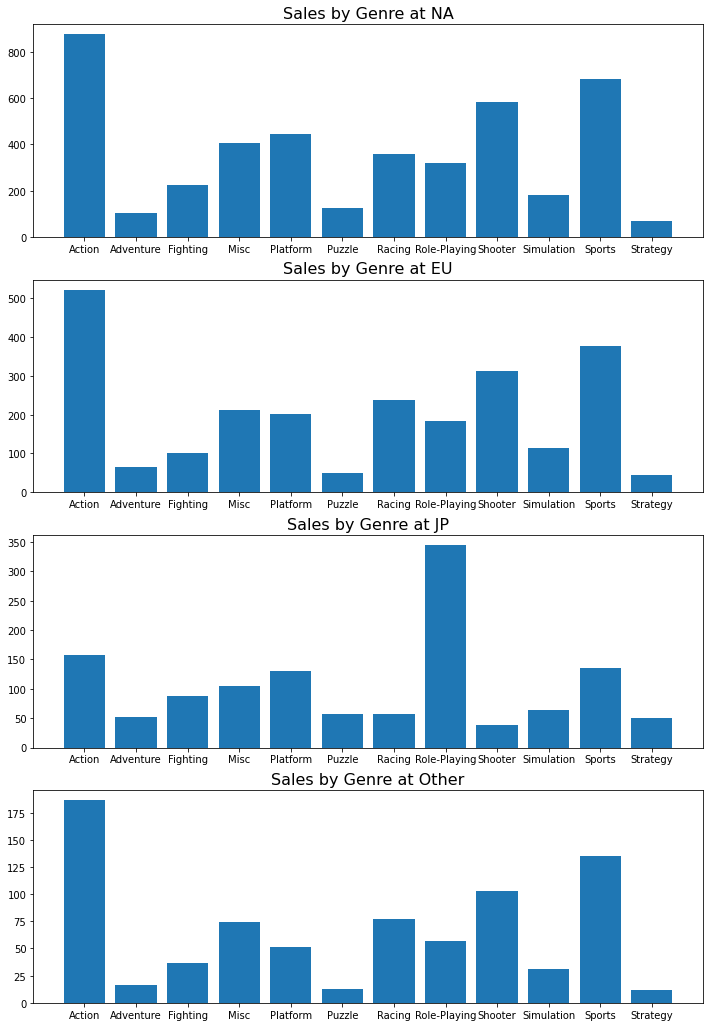

In [12]:
df_1 = df.groupby('Genre').sum().drop(columns=['Year']) #장르기준으로 판매량의 합을 계산
fig, axs = plt.subplots(4, 1,figsize=(12, 18))

axs[0].set_title('Sales by Genre at NA',size = 16)
axs[0].bar(df_1.index, df_1['NA_Sales']);
axs[1].set_title('Sales by Genre at EU',size = 16)
axs[1].bar(df_1.index, df_1['EU_Sales']);
axs[2].set_title('Sales by Genre at JP',size = 16)
axs[2].bar(df_1.index, df_1['JP_Sales']);
axs[3].set_title('Sales by Genre at Other',size = 16)
axs[3].bar(df_1.index, df_1['Other_Sales']);

자료 집계한 연도의 범위가 너무 크다. 비교적 최근(2005~)동안의 선호도로 압축해서 다시 해보자
그리고 그 밑에 게임당 평균판매량(산술평균)과 게임당 판매량의 분포를 알 수 있는 box plot도 같이 표기해보자

(0.0, 1.5)

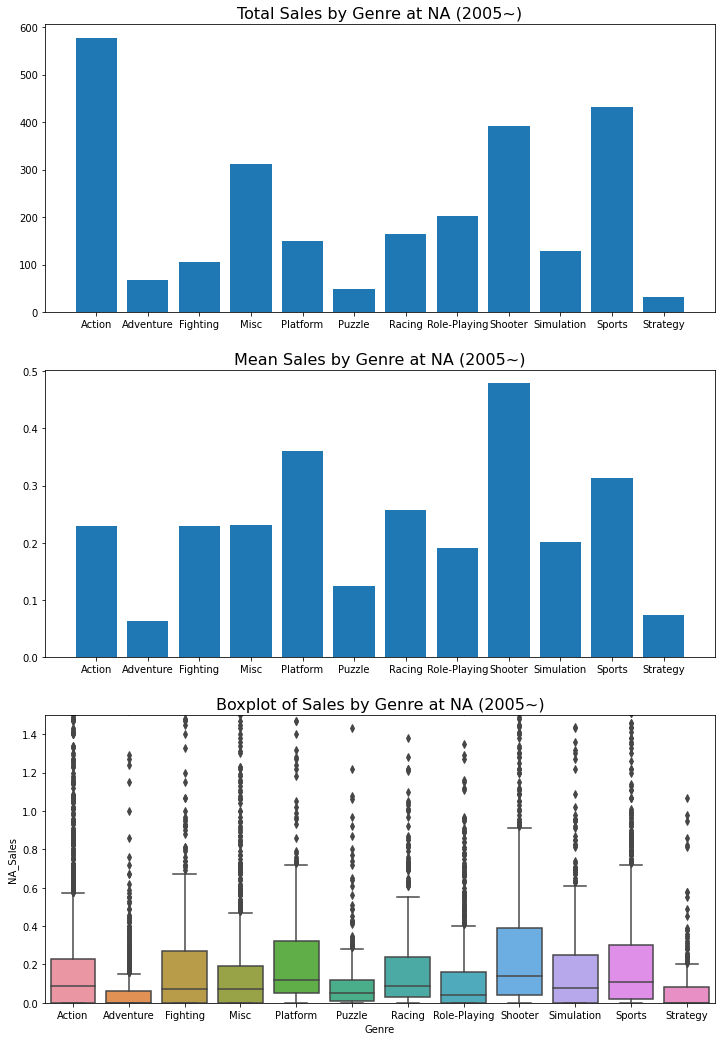

In [13]:
df_recent = df[(df['Year'] > 2004)] # 2005년 이후의 데이터만 다시 저장
df_sum = df_recent.groupby('Genre').sum().drop(columns=['Year']) #장르기준으로 판매량의 합을 계산
df_mean = df_recent.groupby('Genre').mean().drop(columns=['Year']) #장르기준으로 판매량의 평균을 계산

fig, axs = plt.subplots(3, 1,figsize=(12, 18))

axs[0].set_title('Total Sales by Genre at NA (2005~)',size = 16)
axs[0].bar(df_sum.index, df_sum['NA_Sales']);
axs[1].set_title('Mean Sales by Genre at NA (2005~)',size = 16)
axs[1].bar(df_sum.index, df_mean['NA_Sales']);
axs[2].set_title('Boxplot of Sales by Genre at NA (2005~)',size = 16)
axs[2] = sns.boxplot(x="Genre", y='NA_Sales', data=df_recent,order=sorted(df_sum.index));
axs[2].set_ylim([0,1.5],)


NA시장의 경우 sales총합은 action이 가장 우세하지만, 평균과 boxplot을 보면 shooter, platform sports등의 장르가 더 안정적인 sales를 기대할 수 있다.

(0.0, 1.5)

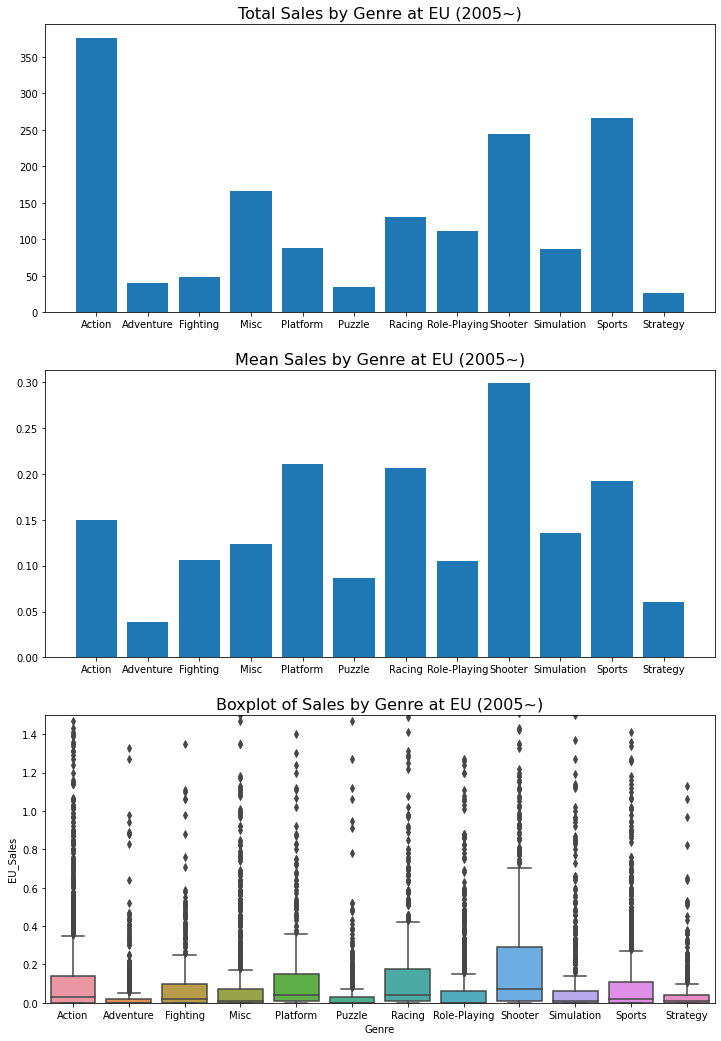

In [14]:
fig, axs = plt.subplots(3, 1,figsize=(12, 18))

axs[0].set_title('Total Sales by Genre at EU (2005~)',size = 16)
axs[0].bar(df_sum.index, df_sum['EU_Sales']);
axs[1].set_title('Mean Sales by Genre at EU (2005~)',size = 16)
axs[1].bar(df_sum.index, df_mean['EU_Sales']);
axs[2].set_title('Boxplot of Sales by Genre at EU (2005~)',size = 16)
axs[2] = sns.boxplot(x="Genre", y='EU_Sales', data=df_recent,order=sorted(df_sum.index));
axs[2].set_ylim([0,1.5],)

EU시장의 경우 sales총합은 action이 가장 우세하지만, 평균과 boxplot을 보면 shooter장르가 더 안정적인 sales를 기대할 수 있다.'

(0.0, 0.6)

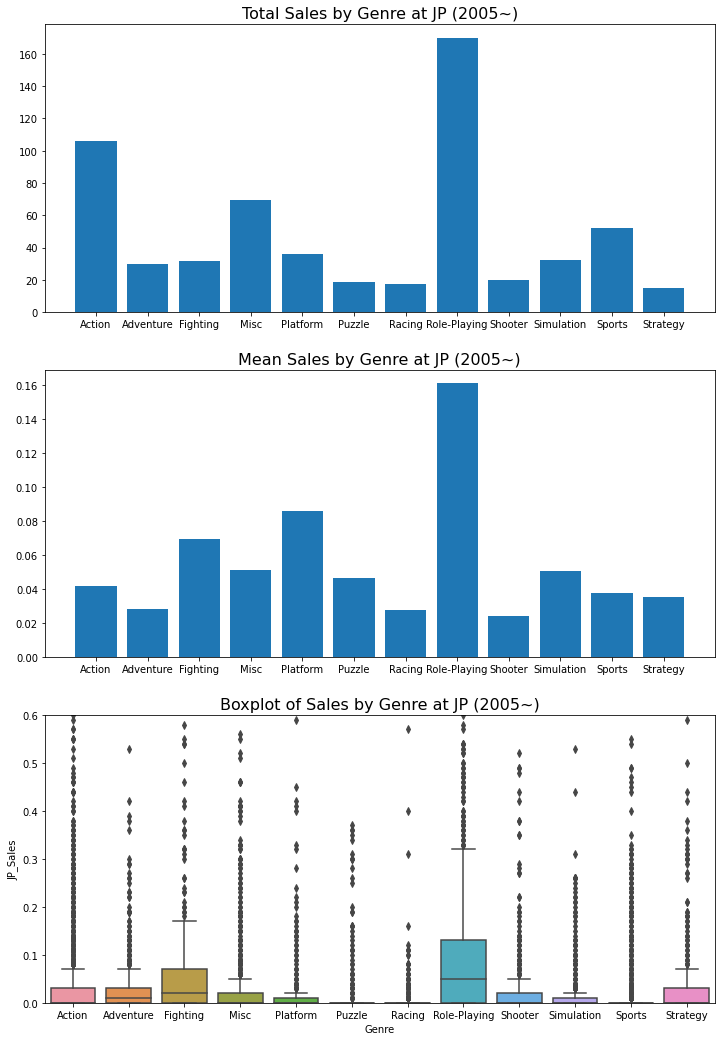

In [15]:
fig, axs = plt.subplots(3, 1,figsize=(12, 18))

axs[0].set_title('Total Sales by Genre at JP (2005~)',size = 16)
axs[0].bar(df_sum.index, df_sum['JP_Sales']);
axs[1].set_title('Mean Sales by Genre at JP (2005~)',size = 16)
axs[1].bar(df_sum.index, df_mean['JP_Sales']);
axs[2].set_title('Boxplot of Sales by Genre at JP (2005~)',size = 16)
axs[2] = sns.boxplot(x="Genre", y='JP_Sales', data=df_recent,order=sorted(df_sum.index));
axs[2].set_ylim([0,0.6])

JP시장의 경우 전체적으로 Role-Playing 장르가 가장 잘 팔린다.

(0.0, 0.4)

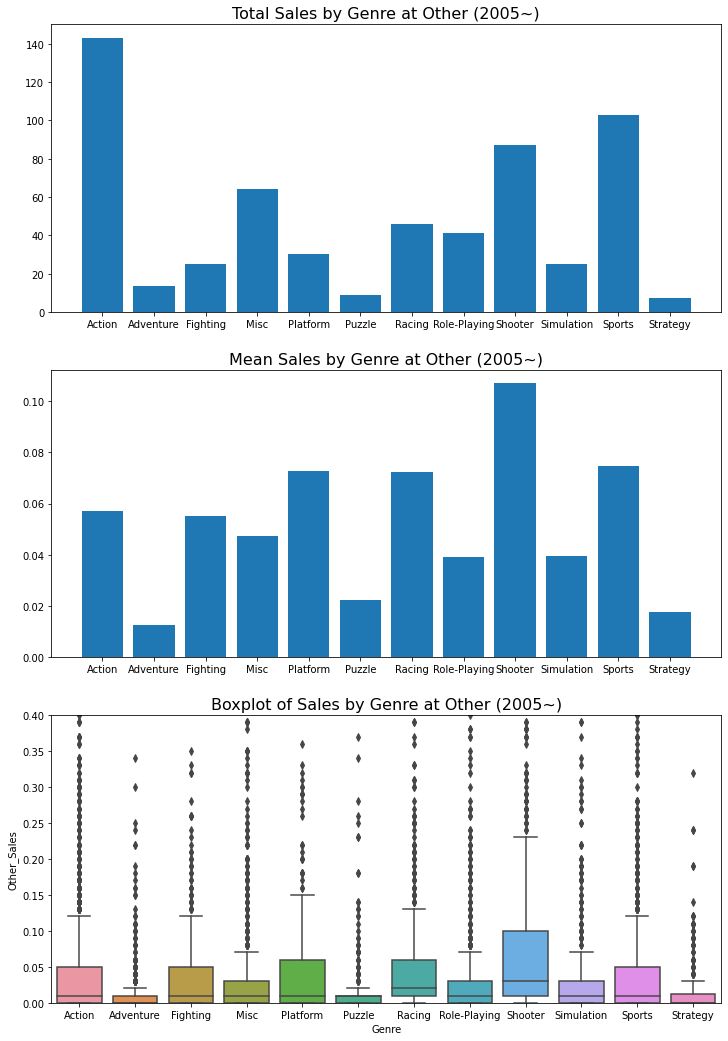

In [16]:
fig, axs = plt.subplots(3, 1,figsize=(12, 18))

axs[0].set_title('Total Sales by Genre at Other (2005~)',size = 16)
axs[0].bar(df_sum.index, df_sum['Other_Sales']);
axs[1].set_title('Mean Sales by Genre at Other (2005~)',size = 16)
axs[1].bar(df_sum.index, df_mean['Other_Sales']);
axs[2].set_title('Boxplot of Sales by Genre at Other (2005~)',size = 16)
axs[2] = sns.boxplot(x="Genre", y='Other_Sales', data=df_recent,order=sorted(df_sum.index));
axs[2].set_ylim([0,0.4])

Other 시장의 경우 sales총합은 action이 가장 우세하지만, 평균과 boxplot을 보면 shooter등의 장르가 더 안정적인 sales를 기대할 수 있다.

결론적으로 NA, EU, Others에서는 shooter, action, platform 장르가, JA시장에서는 Role Playing이 잘 팔리는 것을 알 수 있다.
추가적으로 지역별 sales간의 correlation을 계산해보면,

In [17]:
df_recent2 = df[(df['Year'] > 2004)]
temp = df_recent2[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
np.corrcoef(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']],rowvar=False)

array([[1.        , 0.76772675, 0.44978741, 0.63473727],
       [0.76772675, 1.        , 0.43558445, 0.72638489],
       [0.44978741, 0.43558445, 1.        , 0.29018625],
       [0.63473727, 0.72638489, 0.29018625, 1.        ]])

상기와 같이 대체적으로 양의 상관관계를 나타낸다. 인기가 있는 게임일수록 타지역에서도 잘 팔리는 경향을 보인다는 것이다.

다음은 연도별로 선호하는 장르가 어떻게 바뀌는지 보자

먼저 연도별로 장르별 발매된 게임의 타이틀 수를 계산해보자

(1995.0, 2020.0)

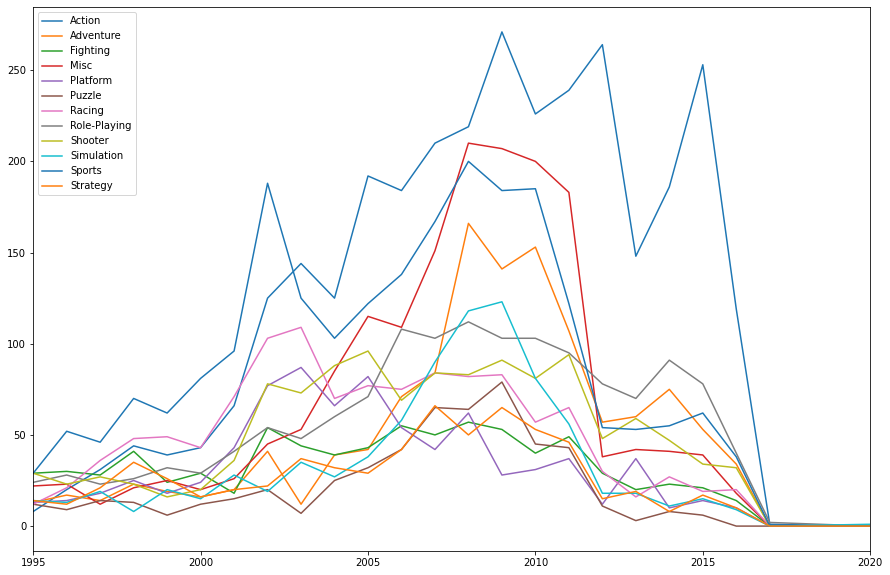

In [18]:
df_crosstab = pd.crosstab(df['Year'], df['Genre']) #year별로 출시된 Genre의 갯수를 frequency table로 변환

plt.figure(figsize=(15,10))
for i in df_crosstab.columns:
  plt.plot(df_crosstab.index,df_crosstab[i])
plt.legend(df_crosstab,loc='upper left');
plt.xlim([1995,2020])

매년 발매되는 총 게임의 숫자가 다르니 각 년도별로 Genre별 장르별 비율을 구해서 다시 시각화해보자

In [19]:
df_crosstab_ratio = df_crosstab
for i in df_crosstab.index:
  df_crosstab_ratio.loc[i] = df_crosstab.loc[i] / df_crosstab.loc[i].sum()

(0.0, 0.5)

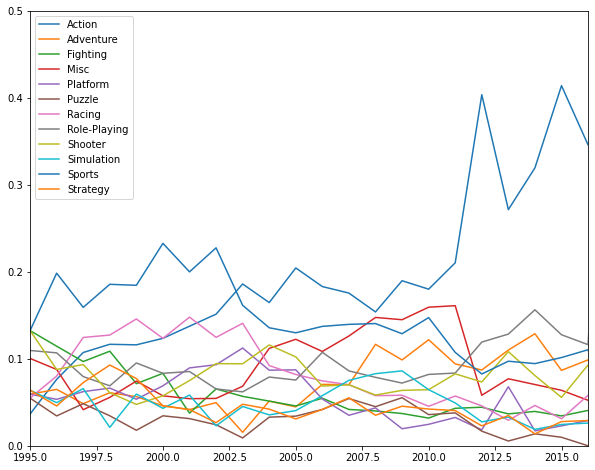

In [20]:
plt.figure(figsize=(10,8))
for i in df_crosstab_ratio.columns:
  plt.plot(df_crosstab_ratio.index,df_crosstab_ratio[i])
plt.legend(df_crosstab_ratio,loc='upper left');
plt.xlim([1995,2016])
plt.ylim([0,0.5])

1990년대에는 sport가 발매게임 중 가장 많은 비율을 차지했고, 그 이후부터는 action이 제일 많았다.2000년대에는 misc장르(파티,댄스,)와 같은 캐쥬얼게임수의 확대도 눈에 보인다. 2010년부터는 Role-playing게임의 수가 늘어났다.

 다음은 연도별 게임 트렌드를 판매량으로 분석해보자
여기서 참고해야 될 사항은, 게임의 출시년도 - 판매량의 데이터가 해당 년도의 판매량을 반영하지 못한다는 것이다
예를들어 하기 사진과 같이, Grand Theft Auto V 같은 게임은 2013년에 발매되있고 NA Sales가 약 10M으로 집계되지만 이것은 발매년도 이후 약 5년동안 판매된 누적 수치이다.
따라서 주어진 data의 연도별 판매량의 추이를 보다 합리적으로 추론할 수 있는 가정이 필요하다

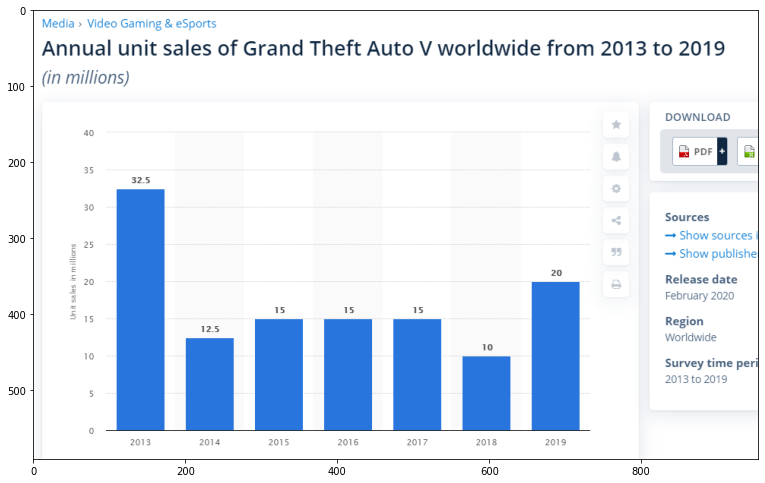

In [22]:
from PIL import Image
image = Image.open('/content/drive/My Drive/Code/image.PNG')
plt.figure(figsize=(13,10))
plt.imshow(image) 
plt.show()  # display it

따라서 이번 분석에서는 총 누적판매량 50퍼센트를 1년차에, 25퍼센트를 2년차에, 나머지 25퍼센트를 나머지 3년차에 파는것으로 가정하였다

In [23]:
#df.groupby('Year').sum()
df['sum_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

#pivot_table을 이용하여 year별 Genre의 sales 합산을 계산
df_pivot_table = df.pivot_table(index=['Year'],columns =['Genre'],values = ['sum_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],aggfunc=np.sum).fillna(0)
temp2 = df_pivot_table
df_pivot_table.head()

EU_Sales                           ... sum_Sales                           
Genre    Action Adventure Fighting  Misc  ...   Shooter Simulation Sports Strategy
Year                                      ...                                     
1980.0     0.02      0.00     0.04  0.15  ...      7.07       0.00   0.00      0.0
1981.0     0.81      0.00     0.00  0.00  ...     10.02       0.44   0.78      0.0
1982.0     0.38      0.00     0.00  0.05  ...      3.81       0.00   1.06      0.0
1983.0     0.17      0.02     0.00  0.00  ...      0.49       0.00   3.20      0.0
1984.0     0.19      0.00     0.00  0.00  ...     31.10       0.00   6.17      0.0

[5 rows x 60 columns]

In [24]:
#누적판매량 50퍼센트를 1년차에, 25퍼센트를 2년차에, 나머지 25퍼센트를 나머지 3년차에 파는것으로 평준화

df_pivot_table_AverageSales = df_pivot_table
df_pivot_table.loc[1985] = 0.25 * df_pivot_table.loc[1983] + 0.25 * df_pivot_table.loc[1984] + 0.5 * df_pivot_table.loc[1985]

for i in range (1980,2018):
  if i <= 1983:
    continue
  else:
    df_pivot_table_AverageSales.loc[i] = (2.0/4.0) * df_pivot_table.loc[i] + (1.0/4.0) * df_pivot_table.loc[i-1] + (1.0/4.0) * df_pivot_table.loc[i-2]

평준화를 시킨 데이터를 적용해서 plotting해보면, 다음과 같은 결과를 볼 수 있다.

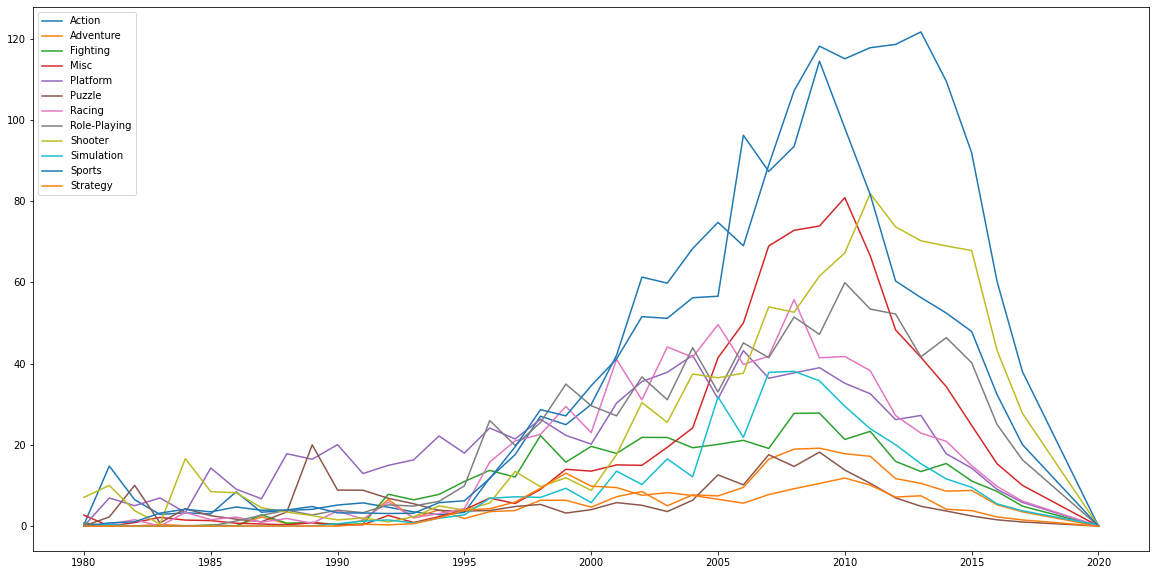

In [25]:
plt.figure(figsize=(20,10))
for i in df_pivot_table_AverageSales['sum_Sales'].columns:
  plt.plot(df_pivot_table_AverageSales.index,df_pivot_table_AverageSales['sum_Sales'][i])
plt.legend(df_pivot_table_AverageSales['sum_Sales'],loc='upper left');

90년대까지는 Platform 게임이 잘 팔리다가, 2000년부터 action, sports, misc, shooter게임들이 잘 팔리는 것을 알 수 있다.

잘 팔리는 게임들은 어떤 특징을 더 가지고 있는지 더 분석해보자.
Platform, Genre, Publisher등 여러 feature가 있으므로, 클러스터링 분석을 통해 여러 군집으로 분류한 다음, 높은 판매량을 가지고 있는 군집들의 특성을 분석해볼 계획이다.

먼저 K-means clustering 적용에 앞서, one hot encoding으로 categorical 데이터를 정리하고, PCA로 차원축소를 해보자

In [26]:

df_cluster = df_recent.drop(columns=['Name'])
df_cluster = df_cluster.dropna() #꼭 따로 이렇게 지정해줘야함

In [27]:
#Platform, Year, Genre, Publisher를 One hot encoding 진행

from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_Platform = pd.DataFrame(enc.fit_transform(df_cluster[['Platform']]).toarray())
enc_Platform.index = df_cluster.index
enc_Year = pd.DataFrame(enc.fit_transform(df_cluster[['Year']]).toarray())
enc_Year.index = df_cluster.index
enc_Genre = pd.DataFrame(enc.fit_transform(df_cluster[['Genre']]).toarray())
enc_Genre.index = df_cluster.index
enc_Publisher = pd.DataFrame(enc.fit_transform(df_cluster[['Publisher']]).toarray())
enc_Publisher.index = df_cluster.index
# merge with main df bridge_df on key values

df_new = enc_Platform
df_new = pd.concat([df_new,enc_Year,enc_Genre, df_cluster[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]],axis=1)
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,2,3,4,5,6,7,8,9,10,11,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.00,0.00,0.01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.02,0.00
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.02,0.00
16593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.04,0.00,0.01
16594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.00
16595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.44,0.19,0.03,0.13


One hot encoding 된 데이터로 PCA 진행

In [28]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

Z = scaler.fit_transform(df_new)
#print("\n Standardized Data: \n", Z)

pca = PCA(25)

pca.fit(Z)

#print("\n Eigenvectors: \n", pca.components_)
#print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
#print("\n Projected Data: \n", B)

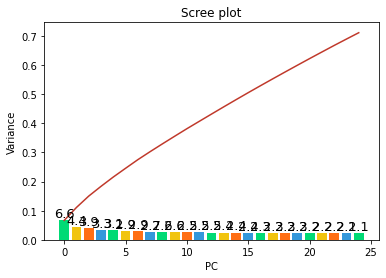

In [29]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    #ax.set_ylim([0,0.1])
    plt.title('Scree plot')
    
scree_plot(pca)

Variance 누적이 0.7이 넘게 클러스터링에 들어갈 PCA데이터의 Number of PC는 25으로 설정한다

클러스터링에 앞서 적절한 클러스터의 갯수를 산정하기 위해, Elbow Method를 적용
Sum of sqaured distance의 감소추이를 확인하여 클러스터의 갯수를 정한다.

In [30]:
'''
from sklearn.cluster import KMeans 
sum_of_squared_distances = []
K = range(1, 60)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(B)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print('k = 60~80에서 클러스터 갯수를 정해보자')
'''

"\nfrom sklearn.cluster import KMeans \nsum_of_squared_distances = []\nK = range(1, 60)\nfor k in K:\n    km = KMeans(n_clusters = k)\n    km = km.fit(B)\n    sum_of_squared_distances.append(km.inertia_)\n\nplt.plot(K, sum_of_squared_distances, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Sum_of_squared_distances')\nplt.title('Elbow Method For Optimal k')\nplt.show()\nprint('k = 60~80에서 클러스터 갯수를 정해보자')\n"

In [31]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 60)
kmeans.fit(B)
labels = kmeans.labels_

In [32]:
labels = pd.DataFrame(labels)
labels.index = df_cluster.index

#원래 데이터에 label 값을 concat으로 붙인다
df_cluster = pd.concat([df_cluster,labels],axis=1)

In [33]:
df_cluster = df_cluster.rename(columns={0: "label"})
df_cluster['Sum_Sales'] = df_cluster['NA_Sales'] + df_cluster['EU_Sales'] + df_cluster['JP_Sales'] + df_cluster['Other_Sales']
df_cluster

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,label,Sum_Sales
0,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,1,0.04
1,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,16,0.18
2,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,48,0.02
3,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,50,0.04
4,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,29,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,PSP,2007.0,Misc,Zenrin,0.00,0.00,0.02,0.00,25,0.02
16593,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,31,0.20
16594,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,3,0.01
16595,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0,0.79


위와 같이 label(clustering 번호)이 붙은 것을 확인할 수 있다.

여기서 sales가 높은 cluster를 찾기 위해 각 지역의 합계 sales를 계산한다음, 클러스터별 평균값을 구하고 그것을 크기순으로 나열해보자

In [34]:
#.pivot_table(index = columns ='label', values = 'Sum_Sales') 

df_new2 = df_cluster.groupby('label').mean().drop(['Year'],axis=1)#.describe()
popular_index = df_new2.sort_values(by=['Sum_Sales'],ascending = False).head(6).index
#plt.boxplot(df_new2);

df_new2.sort_values(by=['Sum_Sales'],ascending = False).head(10)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
label,,,,,
37,41.490000,29.020000,3.770000,8.460000,82.740000
38,10.557500,8.968333,3.713333,2.537500,25.776667
9,5.593750,3.919687,1.488750,1.289062,12.291250
54,2.500000,2.047589,0.388839,0.812321,5.748750
52,0.484730,0.278649,0.002027,0.065541,0.830946
2,0.478252,0.221958,0.009161,0.065105,0.774476
57,0.464023,0.236667,0.002069,0.069080,0.771839
39,0.326987,0.259744,0.055385,0.109615,0.751731
34,0.235227,0.323636,0.026136,0.122727,0.707727


여기서 상위 6개의 cluster에 대하여 box plot 분석으로 평균이 유의미한 값인지 파악해보자

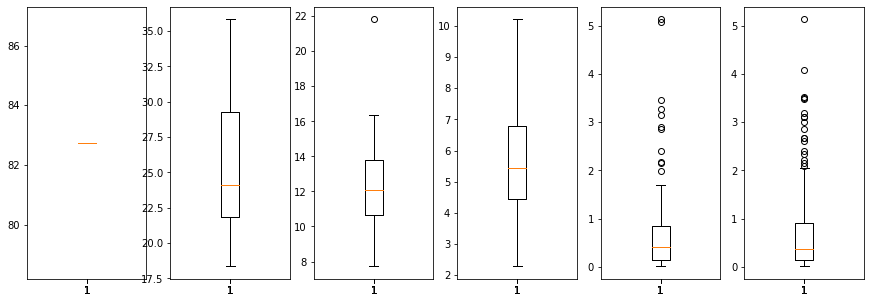

In [35]:
numb=0
fig, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6, sharex=True,figsize=(15,5))
#for i in popular_index:
#  print(i)
#  temp = df_cluster[(df_cluster['label'] == i)]
#  axs[numb] = sns.boxplot(temp['Sum_Sales']);
#  numb = numb+1

temp1 = df_cluster[(df_cluster['label'] == popular_index[0])]
ax1.boxplot(temp1['Sum_Sales']);
temp2 = df_cluster[(df_cluster['label'] == popular_index[1])]
ax2.boxplot(temp2['Sum_Sales']);
temp3 = df_cluster[(df_cluster['label'] == popular_index[2])]
ax3.boxplot(temp3['Sum_Sales']);
temp4 = df_cluster[(df_cluster['label'] == popular_index[3])]
ax4.boxplot(temp4['Sum_Sales']);
temp5 = df_cluster[(df_cluster['label'] == popular_index[4])]
ax5.boxplot(temp5['Sum_Sales']);
temp6 = df_cluster[(df_cluster['label'] == popular_index[5])]
ax6.boxplot(temp6['Sum_Sales']);

각 클러스터에 속해있는 게임들의 리스트를 살펴보자

In [36]:
df.loc[temp1.index] #판매평균 1위 클러스터

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


단일 게임으로 구성된 1위 클러스트, 당시에 이 게임이 왜 성공했는지 따로 자료조사를 통해서 분석해볼 필요가 있다

In [37]:
df.loc[temp2.index] #판매평균 2위 클러스터

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3435,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10555,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10650,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
10899,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


2위 클러스트, 닌텐도의 게임들이 대부분임을 알 수 있다.

In [38]:
df.loc[temp3.index] #판매평균 3위 클러스터

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
223,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
511,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
761,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
2008,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3273,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
4240,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90


3등 클러스터에서는 크게 call of duty 시리즈(shooter), Grand Theft Auto V(Action), Nintendo, Take-Two Interactive 게임으로 분류된다

In [39]:
print(temp3['Publisher'].value_counts())
print(temp3['Genre'].value_counts())
print(temp3['Platform'].value_counts())
print(temp3['Year'].value_counts())

Nintendo                       12
Activision                     10
Take-Two Interactive            5
Microsoft Game Studios          2
Electronic Arts                 1
Sony Computer Entertainment     1
Ubisoft                         1
Name: Publisher, dtype: int64
Shooter         11
Action           7
Platform         3
Role-Playing     3
Simulation       2
Racing           2
Misc             2
Puzzle           1
Fighting         1
Name: Genre, dtype: int64
PS3     8
X360    8
DS      5
3DS     5
Wii     3
PS4     2
PSP     1
Name: Platform, dtype: int64
2012.0    6
2010.0    5
2011.0    5
2008.0    3
2009.0    3
2005.0    3
2013.0    2
2007.0    2
2014.0    2
2015.0    1
Name: Year, dtype: int64


In [62]:
df.loc[temp4.index].head(30) #판매평균 3위 클러스터

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
122,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
384,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,Sega,1.64,2.48,0.44,0.58,5.14
474,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,Activision,1.54,1.94,0.19,0.77,4.44
847,FIFA Soccer 08,PS2,2007.0,Sports,Electronic Arts,0.68,0.00,0.00,2.46,3.14
1035,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
1259,Guitar Hero III: Legends of Rock,Wii,2007.0,Misc,Activision,3.06,1.12,0.00,0.44,4.62
1629,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
1638,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
2260,Far Cry 4,PS4,2014.0,Shooter,Ubisoft,1.12,2.12,0.10,0.69,4.03
2639,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49


In [41]:
print(temp4['Publisher'].value_counts())
print(temp4['Genre'].value_counts())
print(temp4['Platform'].value_counts())
print(temp4['Year'].value_counts())

Electronic Arts                           20
Nintendo                                  17
Ubisoft                                   14
Activision                                12
Microsoft Game Studios                    10
Sony Computer Entertainment               10
Bethesda Softworks                         6
Konami Digital Entertainment               5
Take-Two Interactive                       3
Sega                                       3
Capcom                                     2
505 Games                                  2
Sony Computer Entertainment Europe         2
LucasArts                                  2
Square Enix                                1
Eidos Interactive                          1
Warner Bros. Interactive Entertainment     1
RedOctane                                  1
Name: Publisher, dtype: int64
Action          28
Sports          23
Shooter         20
Misc            14
Role-Playing    13
Platform         4
Simulation       3
Racing           3
Adventur

In [42]:
df.loc[temp5.index] #판매평균 5위 클러스터

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
311,The Crew,XOne,2014.0,Racing,Ubisoft,0.24,0.34,0.0,0.05,0.63
448,WWE 2K15,XOne,2014.0,Sports,Take-Two Interactive,0.28,0.23,0.0,0.04,0.55
528,Dance Central: Spotlight,XOne,2014.0,Misc,Microsoft Game Studios,0.15,0.03,0.0,0.00,0.18
994,Assetto Corsa,XOne,2016.0,Racing,505 Games,0.00,0.01,0.0,0.00,0.01
1145,Lego Batman 3: Beyond Gotham,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.23,0.17,0.0,0.04,0.44
...,...,...,...,...,...,...,...,...,...,...
16076,Rabbids Invasion: The Interactive TV Show,XOne,2014.0,Misc,Ubisoft,0.00,0.01,0.0,0.00,0.01
16186,Sniper Elite 3,XOne,2014.0,Shooter,505 Games,0.19,0.11,0.0,0.03,0.33
16199,Just Dance 2014,XOne,2013.0,Misc,Ubisoft,0.30,0.11,0.0,0.04,0.45
16421,NHL 15,XOne,2014.0,Sports,Electronic Arts,0.31,0.06,0.0,0.03,0.40


In [43]:
print(temp5['Publisher'].value_counts())
print(temp5['Genre'].value_counts())
print(temp5['Platform'].value_counts())
print(temp5['Year'].value_counts())

Ubisoft                                   11
Electronic Arts                           10
Microsoft Game Studios                     9
Activision                                 7
Square Enix                                5
Warner Bros. Interactive Entertainment     4
Take-Two Interactive                       3
505 Games                                  3
Telltale Games                             3
Codemasters                                2
Konami Digital Entertainment               2
Bethesda Softworks                         2
Tecmo Koei                                 2
Disney Interactive Studios                 2
Milestone S.r.l                            1
Deep Silver                                1
Namco Bandai Games                         1
Sega                                       1
Majesco Entertainment                      1
Focus Home Interactive                     1
5pb                                        1
Milestone S.r.l.                           1
Dusenberry

In [44]:
print(temp6['Publisher'].value_counts())
print(temp6['Genre'].value_counts())
print(temp6['Platform'].value_counts())
print(temp6['Year'].value_counts())

Electronic Arts                           32
Take-Two Interactive                      13
Activision                                12
Ubisoft                                    8
Sega                                       7
Microsoft Game Studios                     6
505 Games                                  6
Konami Digital Entertainment               5
Square Enix                                5
THQ                                        5
Capcom                                     5
Namco Bandai Games                         4
Disney Interactive Studios                 2
Atari                                      2
Majesco Entertainment                      2
Tecmo Koei                                 2
Rising Star Games                          2
Cave                                       2
O-Games                                    2
Warner Bros. Interactive Entertainment     2
Deep Silver                                1
Griffin International                      1
Focus Home

cluster 5위,6위는 특정 platform XOne, X360에서 발매된 게임들만 있다

마지막으로 2005년부터 Publisher들의 평균 게임 판매량을 알아보자

In [63]:
df_recent.groupby('Publisher').mean().drop(columns=['Year']).sort_values(by=['NA_Sales'],ascending = False).head(20)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
RedOctane,1.610000,0.327500,0.007500,0.227500
Microsoft Game Studios,1.038522,0.499913,0.021565,0.148957
Nintendo,1.023610,0.743396,0.600374,0.194706
Valve,0.830000,0.630000,0.020000,0.250000
LucasArts,0.618889,0.311270,0.001429,0.142222
Bethesda Softworks,0.592462,0.459385,0.022154,0.152308
Hello Games,0.580000,0.740000,0.020000,0.260000
Valve Software,0.580000,0.383333,0.003333,0.106667
Take-Two Interactive,0.495216,0.269107,0.013026,0.110720


RedOctane, Microsoft Game Studios, Valve 등의 회사가 눈에 띈다

# 결론
1. 지역별 선호도를 조사하였을 때, NA, EU, other 지역은 shooter 장르가, 일본은 롤 플레잉 장르가 인기를 끔 

2. 1990년대에는 sport가 발매게임 중 가장 많은 비율을 차지했고, 
그 이후부터는 action이 제일 많았다.2000년대에는 misc장르(파티,댄스,)와 같은 캐쥬얼게임수의 확대도 눈에 보인다. 2010년부터는 Role-playing게임의 수가 늘어났다.

3. 90년대까지는 Platform 게임이 잘 팔리다가, 2000년부터 action, sports, misc, shooter게임들이 잘 팔리는 것을 알 수 있다.

4. 클러스터링 결과 판매량의 상위인 게임들의 특징을 분석해본 결과, publisher는 Nintendo, Take-Two Interactive, Activision, Mircrosoft Game studios, Ubisoft
등이 인기있는 게임들을 많이 만들었다.

5. Grand Theft Auto 시리즈(action), Call of duty 시리즈와 같은 shooter장르가 인기를 끌고 있다.

6. 인기있는 제작사에서 나오는 인기있는 장르의 게임을 벤치마킹해서 게임을 만들어볼 필요가 있다.

# 한계점
1. 제작비(제작환경)\
&nbsp;&nbsp;결국 사업은 매출이 아니라 수익이기때문에, 게임들의 손익분기점을 아는 것이 중요하다. 비싼 돈을 들여서 만든 게임은 상대적으로 잘 팔릴 수 밖에 없다. 한정된 제작비를 얼마나 투입할 수 있는지, 어떤 스타일의 게임에 특화된 제작환경을 가지고 있는지에 대한 정보가 있다면, 벤치마킹해야 될 게임을 더 정확하게 조사할 수 있을 것이다.

2. 플랫폼\
&nbsp;&nbsp;Platform(게임기)가 일단 많이 깔려있어야 그 게임기에서 돌아가는 게임이 많이 팔린다. 게임의 판매량을 예상하는데 있어서 Platform의 점유율 정보가 있다면 더 좋은 판단을 할 수 있을 것이다.

3. 연도별 판매량\
&nbsp;&nbsp;매년 어느정도로 게임이 팔리고 있는 지를 알면 더 정확한 조사가 가능할 것이다.

4. 장르의 세부적인 구분\
&nbsp;&nbsp;같은 스타일임에도 불구하고 장르가 다르게 표기되었거나, 장르를 더 세부적으로 표현할 필요성이 있다. 포켓몬(액션)과 GTA(액션)은 완전 다른 게임이라고 봐도 무방하다.